# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [95]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [96]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [97]:
df.info()
#id 제외 하고 feature의 type은 int형이 5개, float형이 2개, object형이 5개 입니다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [98]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998,4998,4998,4998.000000,4998,4998,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
unique,NaN,1797,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,21,3765,1996,NaN,2102,1758,NaN,NaN,NaN,NaN,NaN
mean,1.003015e+06,NaN,NaN,NaN,8.036815,NaN,NaN,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,NaN,NaN,NaN,6.442697,NaN,NaN,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12039.000000


Gender의 unique값이 2이므로 이를 구해내는 KNN을 만들겠다.

([<matplotlib.patches.Wedge at 0x7f914b25f350>,
 [Text(-0.785842545718456, 0.7697087068097492, 'M'),
  Text(0.7858425457184559, -0.7697087068097493, 'F')])

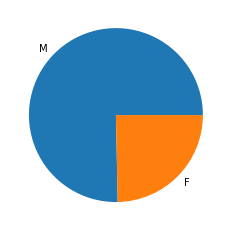

In [99]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, recall_score, precision_score
from tqdm import tqdm

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
from scipy.stats import spearmanr

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False
# Target label 분포
target_label_count = df['Gender'].value_counts()
plt.pie(target_label_count, labels = target_label_count.index)

#Data의 비율이 같지 않고, M의 비율이 3배정도 높다. 따라서 치우쳐진 데이터이다.

<AxesSubplot:>

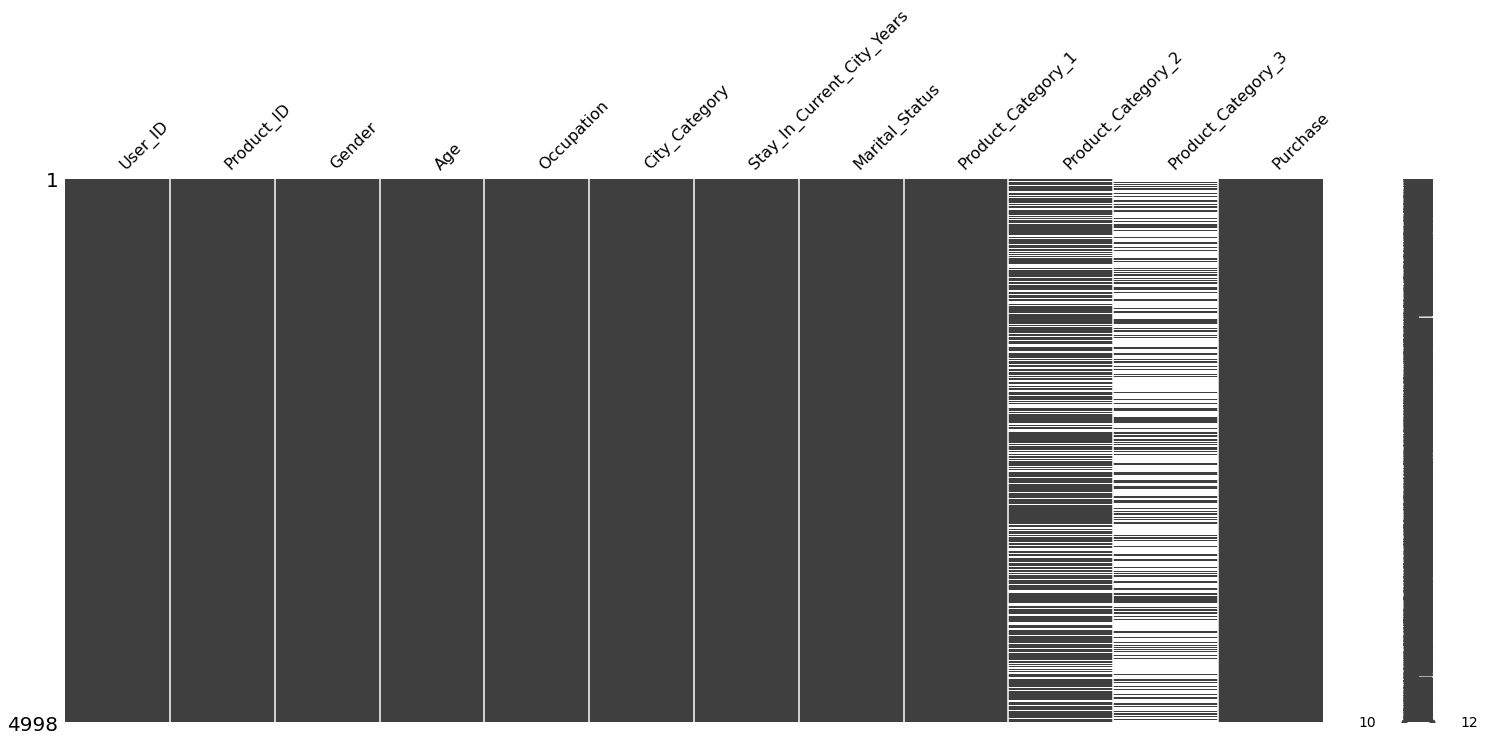

In [100]:
import missingno as msno

msno.matrix(df)

In [101]:
df.isnull().sum()
#Product_Category_2, Product_Category_3 이 둘이 null값이 굉장히 많다는 것을 확인할 수 있다.
#특히 Product_Category_3의 null 값은 3454/4998 약 69%이기 때문에 제거한다.

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [102]:
df.drop('Product_Category_3', axis=1, inplace=True)

In [103]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,1413


In [104]:
#보간법을 활용하여 결측값 채워 넣기

df.interpolate(method='linear',limit_direction='forward', inplace=True)

In [105]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,10.5,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,11.0,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,10.0,1413


In [106]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

## EDA

In [107]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,4.998000e+03,4998,4998,4998,4998.000000,4998,4998,4998.000000,4998.000000,4998.000000,4998.000000
unique,NaN,1797,2,7,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN
freq,NaN,21,3765,1996,NaN,2102,1758,NaN,NaN,NaN,NaN
mean,1.003015e+06,NaN,NaN,NaN,8.036815,NaN,NaN,0.421369,5.320128,9.799720,9234.655462
std,1.709910e+03,NaN,NaN,NaN,6.442697,NaN,NaN,0.493828,3.912281,4.726185,4999.225081
min,1.000003e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,13.000000
25%,1.001560e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,6.000000,5497.750000
50%,1.003040e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.500000,8049.000000
75%,1.004417e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,12039.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          4998 non-null   float64
 10  Purchase                    4998 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 468.6+ KB


In [109]:
for value in df:
    print("================================")
    print(value)
    print("================================")
    print(df[value].value_counts())

User_ID
1002063    12
1005795    12
1001980    11
1004344    11
1005831    10
           ..
1004939     1
1000837     1
1002876     1
1004919     1
1001471     1
Name: User_ID, Length: 2656, dtype: int64
Product_ID
P00265242    21
P00220442    16
P00151742    15
P00148642    15
P00010742    15
             ..
P00170642     1
P00008442     1
P00280942     1
P00167742     1
P00060642     1
Name: Product_ID, Length: 1797, dtype: int64
Gender
M    3765
F    1233
Name: Gender, dtype: int64
Age
26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64
Occupation
4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64
City_Category
B    2102
C    1555
A    1341
Name: City_Category, dtype: int64
Stay_In_Current_City_Years
1     1758
2      915
3    

위의 내용을 보았을 때, 수치적 데이터는 Purchase로 볼 수 있다.
Stay_In_Current_City_Years는 좀 애매하지만, 4보다 크면 무조건 4+로 처리 되기 때문에 이를 범주형 데이터로 판단하였다.

## KNN 구현하기

In [110]:
num_columns = ["Purchase"]
categorical_columns = ["Occupation", "Marital_Status", "Product_Category_1", "Product_Category_2","Age","Product_ID","City_Category","Stay_In_Current_City_Years"]

for col in categorical_columns:
    df[col] = df[col].astype(str)

범주형 데이터 Label Encoding vs. One-Hot Encoding 

One-Hot Encoding은 언제?
- 순서가 없을 때
- 고유값의 개수가 많지 않을 때 효율적이다.
 
Label Encoding은 언제?
- 순서의 의미가 있을때 (유치원, 초등학교, 대학교 같은 등급, 사원, 대리, 과장, 부장 같은 직급)
- 고유값의 개수가 많을 때 (One-hot Encoding은 당연히 메모리 소비가 많으므로 효율적이진 못하다.)

In [111]:
X = df.drop(["Gender", "User_ID"], axis =1)
y = df["Gender"]
X.head()

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00046042,0-17,10,A,3,0,5,17.0,2010
1,P00347742,0-17,10,A,1,0,7,10.5,4483
2,P00048942,0-17,10,A,1,0,1,4.0,7696
3,P00145242,0-17,10,A,3,0,2,4.0,16429
4,P00106742,0-17,10,A,3,0,3,5.0,5780


In [112]:
# 타깃변수 Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [113]:
# Train set / Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2021)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')


Train set dimension is (3498, 9)
Test set dimension is (1500, 9)


### scaling

In [114]:
# KNN에서는 꼭 scaling작업을 해주어야한다. (영향을 많이 받음)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in num_columns:
    X_train.loc[:, col] = scaler.fit_transform(np.array(X_train[col]).reshape(-1, 1))
    X_test.loc[:, col] = scaler.transform(np.array(X_test[col]).reshape(-1,1))

In [115]:
#여기서 categorical_colums의 항목들을 모두 one-hot encoding의 형태로 바꾼다.

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse = False)

all_X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)

one_hot_encoder.fit(all_X[categorical_columns])

new_X = one_hot_encoder.transform(all_X[categorical_columns])

one_hot_columns = one_hot_encoder.categories_[0].tolist()

for idx in range(len(one_hot_encoder.categories_)-1):
    one_hot_columns += one_hot_encoder.categories_[idx+1].tolist()
    
one_hot_columns

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10.0',
 '10.25',
 '10.333333333333332',
 '10.333333333333334',
 '10.399999999999999',
 '10.4',
 '10.5',
 '10.600000000000001',
 '10.666666666666666',
 '10.666666666666668',
 '10.75',
 '10.8',
 '11.0',
 '11.142857142857142',
 '11.2',
 '11.333333333333332',
 '11.333333333333334',
 '11.4',
 '11.5',
 '11.6',
 '11.666666666666666',
 '11.666666666666668',
 '11.75',
 '12.0',
 '12.2',
 '12.25',
 '12.333333333333332',
 '12.333333333333334',
 '12.428571428571429',
 '12.5',
 '12.666666666666666',
 '12.666666666666668',
 '12.75',
 '12.8',
 '13.0',
 '13.2',
 '13.25',
 '13.333333333333332',
 '13.333333333333334',
 '13.5',
 '13.6',
 '13.666666666666666',
 '13.666666666666668',
 '13.714285714285714',
 '13.75',
 '13.833333333

In [116]:
new_X_df = pd.DataFrame(new_X, columns = one_hot_columns)

In [117]:
new_X_df.head()

,0,1,10,11,12,13,14,15,16,17,...,P0099442,P0099942,A,B,C,0,1,2,3,4+
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [118]:
all_X.drop(columns=categorical_columns, inplace=True)
X = pd.concat([all_X, new_X_df], axis = 1)

In [119]:
categorical_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Age',
 'Product_ID',
 'City_Category',
 'Stay_In_Current_City_Years']

In [120]:
X.head()

,Purchase,0,1,10,11,12,13,14,15,16,...,P0099442,P0099942,A,B,C,0,1,2,3,4+
0,-0.359326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.292468,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.759881,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.105821,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.269357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=12212)
knn = KNeighborsClassifier(5) # n_neighbors = 5 # metric ='euclidean'
knn.fit(x_train, y_train)
print('test score : {:.3f}'.format(knn.score(x_test, y_test)))

test score : 0.705


In [123]:
results = knn.predict(x_test)
results

array([1, 1, 1, ..., 1, 1, 1])

### 파라미터 튜닝
+ K 개수 결정
+ Distance measure 결정

In [131]:
# 탐색해볼 K 리스트:1~100 사이의 홀수 값들
k_list = [i for i in range(1, 100) if i%2 !=0] 
cv_scores = []

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    # p=1: manhattan_distance, p=2: euclidean_distance, # p=l_p: minkoski_distance
    
    # 10-cross validation으로 탐색
    # scores: k값마다 10개의 값 누적 
    scores = cross_val_score(classifier, x_train, y_train, cv=10, scoring = 'accuracy')
    
    # scores의 평균을 k값 마다의 성능 평가 결과로 사용
    cv_scores.append(scores.mean())

100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


##  평가

In [133]:
classifier = KNeighborsClassifier(n_neighbors = 5, p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_true = y_test, y_pred = y_pred) # 정확도
recall = recall_score(y_true = y_test, y_pred = y_pred) # 민감도
precision = precision_score(y_true = y_test, y_pred = y_pred) # 정밀도

print(f"정확도:{acc:0.2f}", f"민감도:{recall:0.2f}", f"정밀도:{precision:0.2f}", sep=' | ')

정확도:0.70 | 민감도:0.89 | 정밀도:0.76
